<a href="https://colab.research.google.com/github/georgiastuart/WeTeach_Python/blob/main/WeTeach_Python_Day_2_Lesson_2_Filled_Out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WeTeach_Python Day 2 Lesson 2: Interacting with Data APIs

Another way to access data from online applications is with a web *API* (application programming interface). 

We will use REST (Representational state transfer) methods to retrieve data. 

Here's a big list of public APIs: https://github.com/public-apis/public-apis 

Lets have some fun with baseball statistics!

https://appac.github.io/mlb-data-api-docs/ 


In [ ]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = "http://lookup-service-prod.mlb.com/"

In [ ]:
teams = requests.get(url + "json/named.team_all_season.bam?sport_code='mlb'&all_star_sw='N'&sort_order='name_asc'&season=2019")
teams

<Response [200]>

In [ ]:
type(teams)

requests.models.Response

In [ ]:
team_data = teams.json()
team_list = team_data['team_all_season']['queryResults']['row']
team_data['team_all_season']['queryResults']['row'][0].keys()

dict_keys(['phone_number', 'venue_name', 'franchise_code', 'all_star_sw', 'sport_code', 'address_city', 'city', 'name_display_full', 'spring_league_abbrev', 'time_zone_alt', 'sport_id', 'venue_id', 'mlb_org_id', 'time_zone_generic', 'mlb_org', 'last_year_of_play', 'league_full', 'home_opener_time', 'address_province', 'league_id', 'name_abbrev', 'bis_team_code', 'league', 'spring_league', 'base_url', 'address_zip', 'sport_code_display', 'mlb_org_short', 'time_zone', 'address_line1', 'mlb_org_brief', 'address_line2', 'season', 'address_line3', 'division_abbrev', 'name_display_short', 'team_id', 'active_sw', 'address_intl', 'state', 'address_country', 'mlb_org_abbrev', 'division', 'team_code', 'name', 'website_url', 'sport_code_name', 'first_year_of_play', 'league_abbrev', 'name_display_long', 'store_url', 'time_zone_text', 'name_short', 'home_opener', 'address_state', 'division_full', 'time_zone_num', 'spring_league_full', 'address', 'name_display_brief', 'file_code', 'division_id', 'sp

In [ ]:
for team in team_list:
  print('Team name: {}, venue: {}, id: {}'.format(team['name_display_full'], team['venue_name'], team['mlb_org_id']))

Team name: Arizona Diamondbacks, venue: Chase Field, id: 109
Team name: Atlanta Braves, venue: SunTrust Park, id: 144
Team name: Baltimore Orioles, venue: Oriole Park at Camden Yards, id: 110
Team name: Boston Red Sox, venue: Fenway Park, id: 111
Team name: Chicago Cubs, venue: Wrigley Field, id: 112
Team name: Chicago White Sox, venue: Guaranteed Rate Field, id: 145
Team name: Cincinnati Reds, venue: Great American Ball Park, id: 113
Team name: Cleveland Indians, venue: Progressive Field, id: 114
Team name: Colorado Rockies, venue: Coors Field, id: 115
Team name: Detroit Tigers, venue: Comerica Park, id: 116
Team name: Houston Astros, venue: Minute Maid Park, id: 117
Team name: Kansas City Royals, venue: Kauffman Stadium, id: 118
Team name: Los Angeles Angels, venue: Angel Stadium, id: 108
Team name: Los Angeles Dodgers, venue: Dodger Stadium, id: 119
Team name: Miami Marlins, venue: Marlins Park, id: 146
Team name: Milwaukee Brewers, venue: Miller Park, id: 158
Team name: Minnesota T

In [ ]:
rbi_list = []
avg_list = []

name_list = []

team_id = [135]

for index, teamid in enumerate(team_id):
  players = requests.get(url + "json/named.roster_team_alltime.bam?start_season=1998&end_season=1998&team_id={}".format(teamid))
  player_list = players.json()['roster_team_alltime']['queryResults']['row']

  print(len(player_list))

  for player in player_list:
    print(player['name_last_first'])
    name_list.append(player['name_last_first'])

  for player in player_list:
    hitting_stats = requests.get(url + "json/named.sport_career_hitting.bam?league_list_id='mlb'&game_type='R'&player_id={}".format(player['player_id']))

    try:
      hitting_stats_dict = hitting_stats.json()['sport_career_hitting']['queryResults']['row']

      rbi_list.append(hitting_stats_dict['rbi'])
      avg_list.append(hitting_stats_dict['avg'])
    except KeyError:
      rbi_list.append('')
      avg_list.append('')

42
Arias, George
Ashby, Andy
Boehringer, Brian
Brown, Kevin
Bruske, Jim
Caminiti, Ken
Cianfrocco, Archi
Clement, Matt
Cunnane, Will
Davis, Ben
Finley, Steve
Giovanola, Ed
Gomez, Chris
Gwynn, Tony
Hamilton, Joey
Hernandez, Carlos
Hitchcock, Sterling
Hoffman, Trevor
Joyner, Wally
Kroon, Marc
Langston, Mark
Leyritz, Jim
Miceli, Dan
Mouton, James
Myers, Greg
Myers, Randy
Ramirez, Roberto
Reyes, Carlos
Rivera, Ruben
Romero, Mandy
Sanders, Scott
Sheets, Andy
Smith, Pete
Spencer, Stan
Sweeney, Mark
Van Ryn, Ben
Vander Wal, John
Vaughn, Greg
Veras, Quilvio
Wall, Donne
Wengert, Don
Williams, Eddie


In [ ]:
print(name_list)
print(rbi_list)
print(avg_list)

['Arias, George', 'Ashby, Andy', 'Boehringer, Brian', 'Brown, Kevin', 'Bruske, Jim', 'Caminiti, Ken', 'Cianfrocco, Archi', 'Clement, Matt', 'Cunnane, Will', 'Davis, Ben', 'Finley, Steve', 'Giovanola, Ed', 'Gomez, Chris', 'Gwynn, Tony', 'Hamilton, Joey', 'Hernandez, Carlos', 'Hitchcock, Sterling', 'Hoffman, Trevor', 'Joyner, Wally', 'Kroon, Marc', 'Langston, Mark', 'Leyritz, Jim', 'Miceli, Dan', 'Mouton, James', 'Myers, Greg', 'Myers, Randy', 'Ramirez, Roberto', 'Reyes, Carlos', 'Rivera, Ruben', 'Romero, Mandy', 'Sanders, Scott', 'Sheets, Andy', 'Smith, Pete', 'Spencer, Stan', 'Sweeney, Mark', 'Van Ryn, Ben', 'Vander Wal, John', 'Vaughn, Greg', 'Veras, Quilvio', 'Wall, Donne', 'Wengert, Don', 'Williams, Eddie']
['55', '26', '2', '29', '0', '983', '185', '12', '4', '204', '1167', '19', '486', '1138', '22', '141', '5', '5', '1106', '0', '5', '387', '0', '147', '396', '7', '0', '0', '203', '5', '8', '113', '15', '1', '250', '0', '430', '1072', '239', '1', '0', '150']
['.238', '.134', '.065

In [ ]:
batting_df = pd.DataFrame({'player_names': name_list, 'rbi': rbi_list, 'avg': avg_list})
batting_df = batting_df.astype({'rbi': 'int', 'avg': 'double'}, errors='ignore')
batting_df

,player_names,rbi,avg
0,"Arias, George",55,.238
1,"Ashby, Andy",26,.134
2,"Boehringer, Brian",2,.065
3,"Brown, Kevin",29,.129
4,"Bruske, Jim",0,.100
5,"Caminiti, Ken",983,.272
6,"Cianfrocco, Archi",185,.241
7,"Clement, Matt",12,.095
8,"Cunnane, Will",4,.200
9,"Davis, Ben",204,.237


In [ ]:
print(batting_df['rbi'])

In [ ]:
# empty_index = avg_list.index('')
# print(empty_index)

# del name_list[empty_index]
# del rbi_list[empty_index]
# del avg_list[empty_index]

# rbi_numbers = [int(rbi) for rbi in rbi_list]
# avg_numbers = [float(avg) for avg in avg_list]

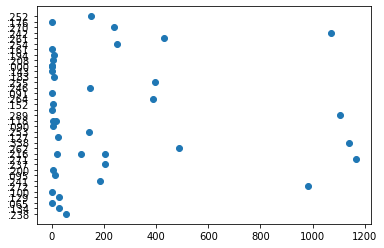

In [ ]:
plt.scatter(batting_df['rbi'], batting_df['avg'])